In [56]:
import pygad # https://pypi.org/project/pygad/
import sys
import math
import numpy
# 將二進位陣列轉換成十進位數字
def convert_to_decimal(binary_arr):
    binary_str = "".join(str(int(x)) for x in binary_arr) # 串接陣列內各元素，組成二進位字串
    #print("convert_to_decimal",binary_str,binary_arr)
    return int(binary_str, 2) # 二進位轉十進位

# 適合度函數
def fitness_func(solution, solution_idx):
    dec_val = convert_to_decimal(solution)
    # print('fitness_func()')
    # print(solution)
    # print(dec_val)

    if dec_val == 0:
        return sys.maxsize
    else:
        return 1 / math.pow(dec_val, 2)

# # 執行完 "選擇"(selection) 後的 callback
# def on_parents(ga_instance, selected_parents):
#     curr_generation = str(ga_instance.generations_completed)

#     print("世代 " + curr_generation + " 族群內個體 (on_parents)")
#     print(ga_instance.population)

#     print("從世代 " + curr_generation + " 挑選出的個體")
#     print(selected_parents)

# def on_crossover(ga_instance, offspring_crossover):
#     print("交配出的後代 (on_crossover)")
#     print(offspring_crossover)

# def on_mutation(ga_instance, offspring_mutation):
#     print("突變後的後代 (on_mutation)")
#     print(offspring_mutation)

# # 產生新族群後的 callback
# def on_generation(ga_instance):    
#     curr_generation = str(ga_instance.generations_completed)
#     print("世代 " + curr_generation + " 族群內個體 (on_generation)")
#     print(ga_instance.population)



# function_inputs = [4,-2,3.5,5,-11,-4.7]
# desired_output = 44

# def fitness_func(solution, solution_idx):
#     output = numpy.sum(solution*function_inputs)
#     fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
#     return fitness

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")



In [60]:
# 建立 GA 實體
ga_instance = pygad.GA(
                       # 產生初始族群
                       sol_per_pop = 50, # 族群內的個體數
                       num_genes = 8, # 個體內的基因數                       
                       gene_space = [0, 1], # 採二進位編碼

                       # 某族群，如 [
                       #               [0, 0, 0, 0, 0, 0, 1, 1], # 個體一 : 3
                       #               [0, 0, 0, 0, 0, 1, 0, 1], # 個體二 : 5 
                       #               .... 共 sol_per_pop 個個體
                       #           ]

                       # 選擇 (selection)
                       parent_selection_type = "rws", # 選擇方式

                       # 交配 (crossover)
                       num_parents_mating = 2, # 取幾個個體進行交配                    
                       crossover_probability = 0.8, # 交配機率
                       crossover_type = "single_point", # 交配方式

                       # 突變 (mutation)
                       mutation_probability = 0.6, # 突變機率
                       mutation_type = "random", # 突變方式
                       mutation_percent_genes = 10, # 欲突變的基因比例

                       # 適應度函數
                       fitness_func = fitness_func,

                       num_generations = 30, # 跑幾個世代

                    # callback
                    #    on_parents = on_parents,
                    #    on_crossover = on_crossover,
                    #    on_mutation = on_mutation,
                    #    on_generation = on_generation
                    )
ga_instance.run() # 執行 GA

# ga_instance.plot_result() # 繪製各世代的適應度趨勢

# 取得最佳解
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("最佳解 : {solution}".format(solution = convert_to_decimal(solution)))
print("最佳解的適應度 : {solution_fitness}".format(solution_fitness = solution_fitness))

if ga_instance.best_solution_generation != -1:
    print("最佳解落在第 {best_solution_generation} 個世代".format(best_solution_generation = ga_instance.best_solution_generation))

print("\n\n\n")

最佳解 : 0
最佳解的適應度 : 9.223372036854776e+18
最佳解落在第 19 個世代






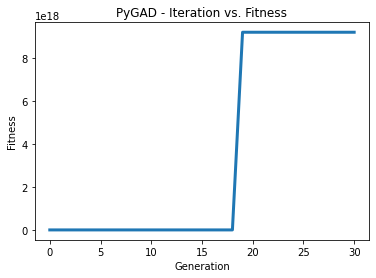

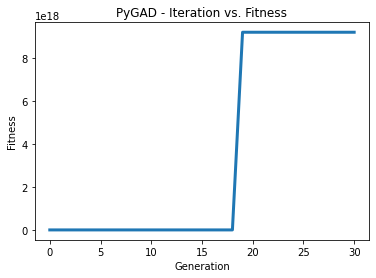

In [61]:
ga_instance.plot_result() # 繪製各世代的適應度趨勢

In [58]:
ga_instance = pygad.GA(num_generations=10,
                       num_parents_mating=2,
                       sol_per_pop=3,
                       num_genes=4,
                       fitness_func=fitness_function,

                       gene_space=[0, 1])
ga_instance.run() # 執行 GA                       